In [1]:

import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

In [2]:

# Load Dataset as train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Feature Scaling
x_train = x_train/255.0
x_test = x_test/255.0


In [4]:
x_train.shape


(60000, 28, 28)

In [5]:

from keras.utils import np_utils

In [6]:

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
y_train.shape


(60000, 10)

In [8]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_tesr = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from keras import Sequential

lenet5 architeture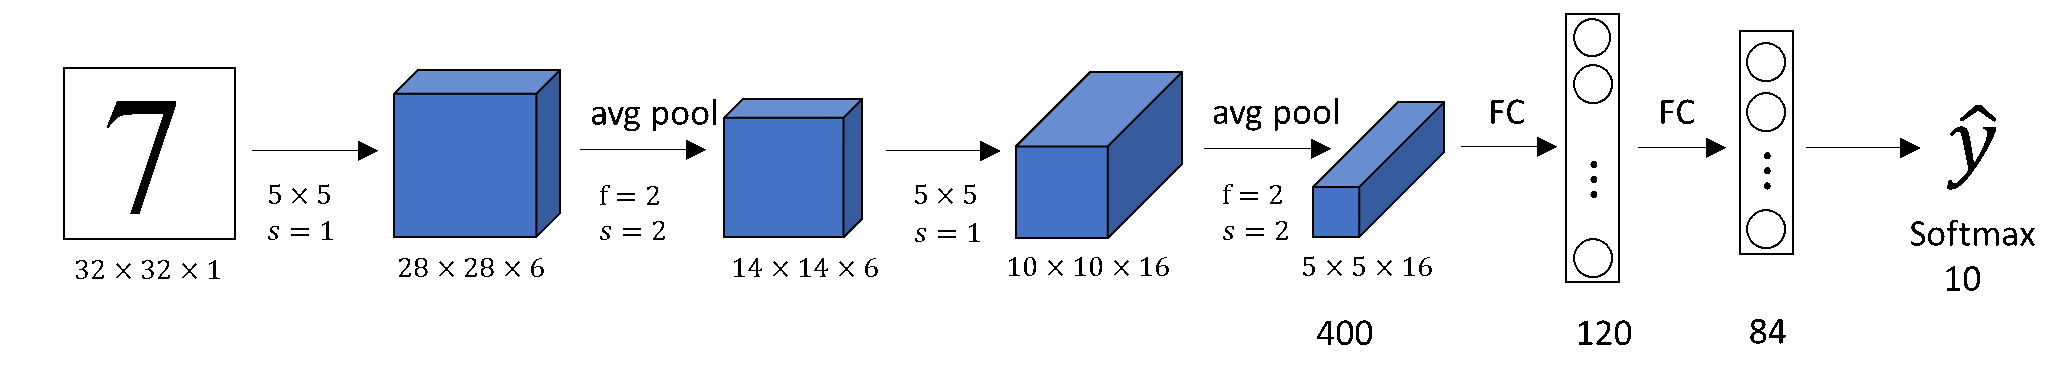

In [11]:
model = Sequential()
#part1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#part2
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#part3

model.add(Flatten())

#part4
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

#part5
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

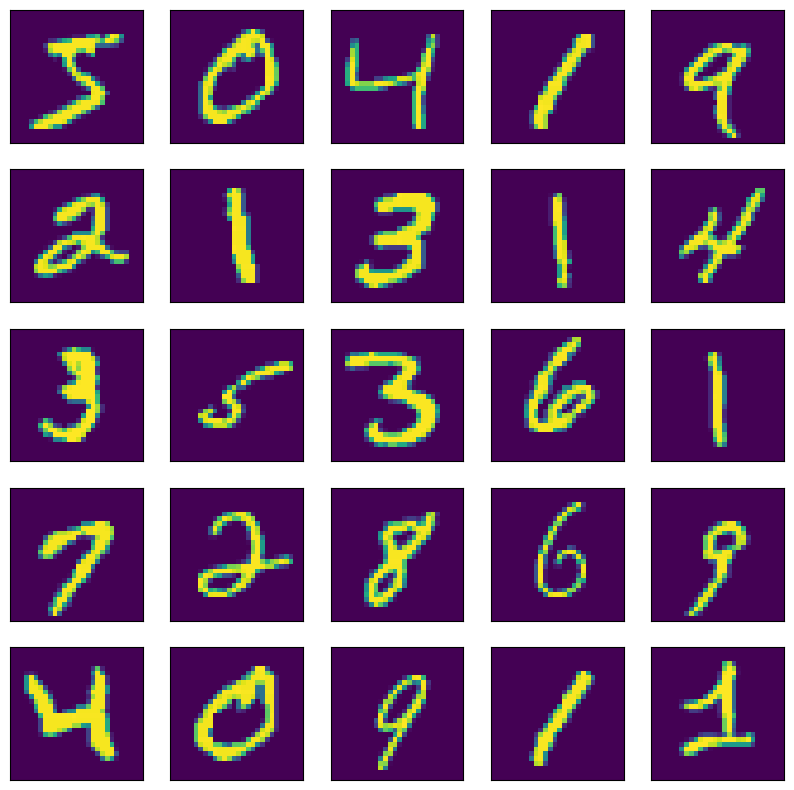

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

In [13]:

model.compile(loss=keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [14]:

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
469/469 [==============================] - 14s 6ms/step - loss: 0.3626 - accuracy: 0.8949 - val_loss: 0.1599 - val_accuracy: 0.9513
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1304 - accuracy: 0.9609 - val_loss: 0.1073 - val_accuracy: 0.9648
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0859 - accuracy: 0.9741 - val_loss: 0.0727 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0720 - val_accuracy: 0.9769
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0566 - val_accuracy: 0.9819
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0558 - val_accuracy: 0.9810
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0513 - val_accuracy: 0.9835
Epoch

The provided code implements the LeNet-5 architecture using a Sequential model in Keras. LeNet-5 is a classic convolutional neural network designed for handwritten digit recognition.

The architecture consists of two sets of convolutional and average pooling layers, followed by fully connected layers. The activation function used throughout the model is hyperbolic tangent (tanh).

The input images are grayscale and have dimensions of 28x28 pixels. The model's layers are added sequentially using the add() function.

After defining the architecture, a visualization of the first 25 images from the training dataset is displayed using Matplotlib.

The model is then trained using the fit() function, with the training data (x_train and y_train) and validation data (x_test and y_test) provided. The training is performed for 20 epochs with a batch size of 128, and the training progress is displayed.

Overall, the code effectively implements the LeNet-5 architecture, trains the model on the MNIST dataset, and provides a visualization of the training images. LeNet-5 has been a foundational architecture in the field of computer vision and is widely recognized for its success in handwritten digit recognition.